# Project 4, APS1070 Winter 2024
#### **Linear Regression -  14 points**
**Deadline: Mar 28th, 23:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Your **name**: Abdullah Rasul
*   Your **student number**: 1011328243

### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files for this notebook on Quercus for grading.


Ref: https://stackoverflow.com/a/64487858

## Part 1 - Getting Started [2 marks]

In this project, we are going to design a mathematical model that predicts the control actions on the ailerons of an aircraft.

For this purpose, we are going to use the [ailerons](https://www.dcc.fc.up.pt/~ltorgo/Regression/ailerons.html) dataset containing 13,750 instances and 40 continuous features describing the status of a F16 aircraft. The goal is to predict the `goal` column, which is the control actions on the ailerons.

In [13]:
import pandas as pd
df = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/Sabaae/Dataset/main/Ailerons.csv',
    index_col=None
)

Here are the steps to complete this portion:

1. Print the dataframe.
2. Prepare your dataset as follows: **[1.5]**
*   Using `train_test_split` from Sklearn, split the dataset into training and validation sets ($80\%$ training, $20\%$ validation). When splitting, set `random_state=1`. **[0.5]**
*   Standardize the data **manually** according to the same method as `StandardScaler` from sklearn, but you may not directly use `StandardScaler'. **[0.5]**
*   Insert a first column of all $1$s in both the training and validation data sets.**[0.5]**
3. Explain why we should not insert the column of $1$s prior to standardization. **[0.5]**

In [14]:
# 1. Print the dataframe.
#--------------------------------------------------------------------------

# Visualizing samples
df

,climbRate,Sgz,p,q,curPitch,curRoll,absRoll,diffClb,diffRollRate,diffDiffClb,...,diffSeTime8,diffSeTime9,diffSeTime10,diffSeTime11,diffSeTime12,diffSeTime13,diffSeTime14,alpha,Se,goal
0,2,-56,-0.33,-0.09,0.90,0.2,-11,12,0.004,-0.1,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.9,0.032,-0.0009
1,470,-39,0.02,0.12,0.39,-0.6,-12,8,0.009,-1.6,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.9,0.034,-0.0011
2,165,4,0.14,0.14,0.78,0.4,-11,-9,-0.003,-0.2,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,1.0,0.034,-0.0012
3,-113,5,-0.12,0.11,1.06,0.6,-10,-7,-0.008,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.9,0.033,-0.0011
4,-411,-21,-0.17,0.07,1.33,-0.6,-11,0,0.002,0.1,...,0.0,0.0,0.0,0.0,0.0,-0.002,0.0,0.9,0.032,-0.0008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13745,399,-22,0.17,0.20,0.36,-0.2,-9,-3,0.010,-3.9,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.8,0.027,-0.0008
13746,237,-6,0.26,0.10,0.52,0.7,-8,-8,-0.004,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.8,0.027,-0.0010
13747,-148,-3,-0.37,0.09,0.89,0.7,-8,-7,-0.013,-0.2,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.7,0.026,-0.0006
13748,-237,-11,-0.47,-0.16,0.90,-0.4,-9,8,0.010,2.8,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.7,0.023,-0.0005


In [15]:
'''

2. Prepare your dataset as follows: [1.5]

2.1 Using train_test_split from Sklearn, split the dataset into training and
validation sets ( 80%  training,  20%  validation).
When splitting, set random_state=1. [0.5]
---------------------------------------------------------------------------
'''

from sklearn.model_selection import train_test_split

X = df.drop(['goal'], axis=1)
y = df['goal']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

print(f"X_train Shape {X_train.shape}")
print(f"X_val Shape {X_val.shape}")
print(f"y_train Shape {y_train.shape}")
print(f"y_val Shape {y_val.shape}")



X_train Shape (11000, 40)
X_val Shape (2750, 40)
y_train Shape (11000,)
y_val Shape (2750,)


In [16]:
'''

2.2 Standardize the data manually according to the same method as StandardScaler
from sklearn, but you may not directly use `StandardScaler'. [0.5]
--------------------------------------------------------------------------

'''

import numpy as np

# Compute mean and standard deviation for each feature in the training set
mean_vals = X_train.mean(axis=0)
std_vals = X_train.std(axis=0)

# Standardize the training set
X_train_standardized = (X_train - mean_vals) / std_vals

# Use the mean and standard deviation from the training set to standardize the validation set
X_val_standardized = (X_val - mean_vals) / std_vals


# showing some samples of the train standardized data
X_train_standardized
#print("---------------------------\n\n")
#print(X_val_standardized)




,climbRate,Sgz,p,q,curPitch,curRoll,absRoll,diffClb,diffRollRate,diffDiffClb,...,diffSeTime7,diffSeTime8,diffSeTime9,diffSeTime10,diffSeTime11,diffSeTime12,diffSeTime13,diffSeTime14,alpha,Se
13066,1.238519,0.143718,0.042118,0.828065,-1.141012,0.550510,-0.231595,0.092103,0.908723,-3.833663,...,0.158794,-0.009535,0.168824,0.006847,0.152214,0.017358,0.158775,0.017164,-0.626431,-0.429921
12973,-0.425772,-0.360543,1.389098,0.322942,0.702887,-0.274730,-1.924958,0.187781,0.757496,0.313847,...,1.953993,-0.009535,0.168824,0.006847,0.152214,0.017358,0.158775,0.017164,0.391328,0.576461
849,1.752379,1.695289,-1.272009,0.322942,-1.522509,1.582061,-0.231595,-0.386287,-1.510909,0.313847,...,0.158794,-0.009535,0.168824,0.006847,0.152214,0.017358,0.158775,0.017164,-0.117551,-0.286152
10361,-0.084477,-0.476911,1.914749,1.838312,-0.028315,0.653665,-0.715413,-1.438745,-2.418271,-1.451051,...,-3.431605,-0.009535,0.168824,0.006847,0.152214,0.017358,0.158775,0.017164,-0.117551,-0.142383
13535,-0.379754,0.182507,2.013308,0.912253,0.416765,-1.099971,-1.199231,-0.864677,0.303815,0.755072,...,-3.431605,-0.009535,0.168824,0.006847,0.152214,0.017358,0.158775,0.017164,0.391328,0.288923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,0.755338,-1.407853,0.206384,-2.202674,-0.664142,-1.512591,0.736041,2.197020,0.530655,0.137357,...,0.158794,-0.009535,0.168824,0.006847,0.152214,0.017358,0.158775,0.017164,-0.117551,-0.142383
5192,-0.118990,-1.524221,-0.187854,-0.771492,-0.346228,-0.790505,0.977950,0.379137,0.833109,0.137357,...,0.158794,-0.009535,0.168824,0.006847,0.152214,0.017358,-3.051740,0.017164,-0.626431,-0.717459
12172,0.437052,0.182507,-0.155001,0.154568,0.830052,0.756821,0.977950,-0.577643,-0.679160,0.137357,...,0.158794,-0.009535,0.168824,0.006847,0.152214,0.017358,0.158775,0.017164,1.917966,2.014150
235,0.736164,-1.136328,-0.319267,-1.529176,-1.045638,-0.377885,0.252223,1.622952,0.001361,-0.039133,...,0.158794,-0.009535,0.168824,0.006847,0.152214,0.017358,0.158775,0.017164,-0.626431,-0.861228


In [17]:
'''

2.3 Insert a first column of all  1 s in both the training and
validation data sets.[0.5]
-----------------------------------------------------------------------

'''

X_train_normalized = np.hstack((np.ones((X_train_standardized.shape[0],1)), X_train_standardized))

X_val_normalized = np.hstack((np.ones((X_val_standardized.shape[0],1)), X_val_standardized))


print(X_train_normalized.shape, X_val_normalized.shape)

# Checking if the first column is 1 now.
X_val_normalized

(11000, 41) (2750, 41)


array([[ 1.00000000e+00, -5.98336305e-01,  4.15242689e-01, ...,
         1.71640745e-02, -6.26430543e-01, -5.73690100e-01],
       [ 1.00000000e+00,  5.63599548e-01,  5.31610507e-01, ...,
         1.71640745e-02, -6.26430543e-01, -5.73690100e-01],
       [ 1.00000000e+00,  1.18483258e+00,  9.19503233e-01, ...,
         1.71640745e-02, -6.26430543e-01, -4.29921223e-01],
       ...,
       [ 1.00000000e+00, -3.83589085e-01, -2.05385672e-01, ...,
         1.71640745e-02, -6.26430543e-01, -8.61227855e-01],
       [ 1.00000000e+00,  3.05662687e-02, -1.14393091e-02, ...,
         1.71640745e-02, -1.17551142e-01, -2.86152345e-01],
       [ 1.00000000e+00,  3.72286618e-03, -8.90178543e-02, ...,
         1.71640745e-02,  3.95348407e+00,  3.73937622e+00]])

In [ ]:
'''
3. Explain why we should not insert the column of  1 s prior to standardization.
------------------------------------------------------------------


Inserting a column of 1s before standardization would cause the added column
to be scaled along with the features, resulting in all its values becoming
zero after standardization due to its mean being 1 and standard deviation
also being 1. This would effectively nullify the affect of this column.

In case of Bias term: The bias term represents the
intercept of the model and is independent of the features.
It allows the model to fit the data more accurately by accounting for the
offset from zero. If the bias term is scaled along with the features,
it can affect the interpretation of its value.

Including the bias term in this process violates these assumptions
since the bias term is typically not centered around zero nor does it
have unit variance.


'''



## Part 2 - Linear Regression Using Direct Solution [1 marks]

Implement the direct solution of the linear regression problem on the training set. **[0.5]**

**Note: You should use scipy.linalg.inv to perform the inversion, as numpy.linalg.inv may cause an error.**

Report the root-mean-square error (RMSE) for both the training and validation sets. **[0.5]**

You may use `mean_squared_error` from Sklearn for computing the RMSE.

In [18]:
from scipy import linalg

from sklearn.metrics import mean_squared_error


# Implement the direct solution of the linear regression problem on the training set. [0.5]
# ----------------------------------------------------------------------

#Direct solution of the linear regression
W = np.dot(linalg.inv(np.dot(X_train_normalized.T, X_train_normalized)), np.dot(X_train_normalized.T, y_train)) # Train the model using training set: finding weights
y_pred_train = np.dot(X_train_normalized, W)
y_pred_val = np.dot(X_val_normalized, W)

#RMSE for train and validation sets
rmse_train_direct = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_val_direct = np.sqrt(mean_squared_error(y_val, y_pred_val))




# Report the root-mean-square error (RMSE) for both the training and validation sets. [0.5]
# -----------------------------------------------------------------------------

print("RMSE for training set =",rmse_train_direct)
print("RMSE for validation set =",rmse_val_direct)

RMSE for training set = 0.00017381676772273245
RMSE for validation set = 0.00017562968859311746


## Part 3 - Full Batch Gradient Descent [4 marks]

We will now implement a "full batch" gradient descent algorithm and record the training time for our model. Recall that the full batch gradient descent is,
 $$w_t = w_{t-1} - \alpha~g_t$$ where $\alpha$ is the learning rate and $g_t$ is your gradient, computed on the entire data.

Here are the steps for this part:

* Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 0.01$, and iterate until your model's **validation** RMSE converges.

  We consider the gradient descent as having converged when RMSE on the validation set using gradient descent satisfies:

  $$ RMSE_\text{GD} \leq 1.001 \times RMSE_\text{Direct Solution}$$

  where $RMSE_\text{Direct Solution}$ is the RMSE on the validation set using the direct solution that you calculated in the previous part.

  We refer to the quantity $RMSE_\text{Direct Solution}\times 1.001$ as the convergence threshold (CT).
  Be sure to compute the gradients yourself! Take a look at the code provided in the tutorial. **[1]**

*  Record the training time (from the first iteration until convergence) using the `time.time()` function. **[0.5]**

* Plot the training RMSE and the validation RMSE vs. epoch on the same figure.  **[1]**

* Comment on overfitting/underfitting by observing the training and validation RMSE **[1]**

**Hint**: Initialize your weights with small random numbers (<$0.001$)

* Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)? **[0.5]**

--- Total Training Time: 2.6286509037017822 (s) ---
Number of epochs to convergence: 661
Final Training RMSE: 0.00017418158298377107
Final Validation RMSE: 0.00017580470515072232


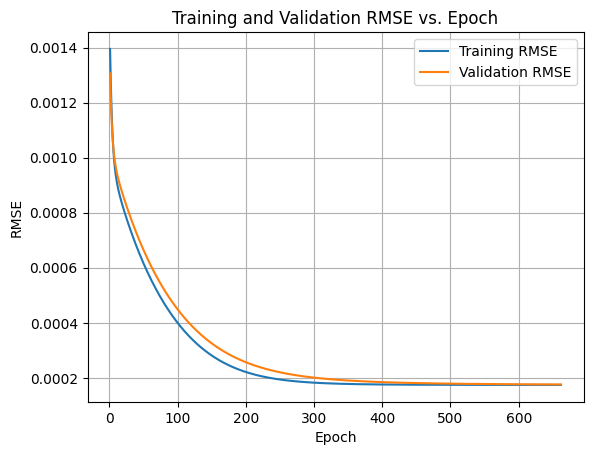

In [36]:
import time
start_time = time.time()
np.random.seed(2)

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


## GD Script -- Sample code in tutorial! ##
weights = np.random.rand(41) / 10000

learning_rate = 0.01
convergence_threshold = 1.001 * rmse_val_direct

rmse_train_history = []
rmse_val_history = []

start_time = time.time()

epoch = 0
while True:
    # Predictions on training set
    y_train_pred = np.dot(X_train_normalized, weights)


    # Be sure to compute the gradients yourself! Take a look at the code provided in the tutorial. [1]
    # --------------------------------------------------------------------------

    # Compute gradients
    gradient = np.dot(X_train_normalized.T, y_train_pred - y_train) / len(y_train_pred)

    # Update weights
    weights -= learning_rate * gradient

    # Predictions on validation set
    y_val_pred = np.dot(X_val_normalized, weights)

    # Compute RMSE on training and validation sets
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))

    # Store RMSE values
    rmse_train_history.append(rmse_train)
    rmse_val_history.append(rmse_val)

    # Check for convergence
    if rmse_val <= convergence_threshold:
        break

    epoch += 1


# Record the training time (from the first iteration until convergence) using the time.time() function. [0.5]
# ---------------------------------------------------------------------------
print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))

print("Number of epochs to convergence:", epoch)
print("Final Training RMSE:", rmse_train)
print("Final Validation RMSE:", rmse_val)



# Plot the training RMSE and the validation RMSE vs. epoch on the same figure. [1]
# ----------------------------------------------------------------------------

# Plotting RMSE vs. epoch
plt.plot(range(1, epoch + 2), rmse_train_history, label='Training RMSE')
plt.plot(range(1, epoch + 2), rmse_val_history, label='Validation RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Training and Validation RMSE vs. Epoch')
plt.legend()
plt.grid()
plt.show()


In [ ]:
'''
Comment on overfitting/underfitting by observing the training and validation RMSE [1]
------------------------------------------------------------------------------------

Underfitting:

At the beginning of training, both the training and validation RMSEs are high.
High RMSE values indicate that the model is not capturing the
underlying patterns in the data effectively.

This initial high RMSE suggests underfitting, meaning the model is
too simple to capture the complexity of the data.

----
Overfitting:

As training progresses (around 20 to 400 epochs in this case), the training
RMSE continues to decrease while the validation RMSE decrease but slower than training.

The training RMSE becoming lower than the validation (around 20 to 400 epochs in this case)
RMSE is indicative of overfitting.

Overfitting occurs when the model learns to memorize the training data too well, capturing noise and irrelevant patterns that do not generalize to unseen data.

---------
Convergence:
As training continues beyond the phase of overfitting (after around 400),
both the training and validation RMSEs start to stabilize and become similar.

This convergence phase indicates that the model has learned the underlying
patterns in the data sufficiently well, leading to similar
performance on both the training and validation sets.


Conclusion:
The initial high RMSE values indicate underfitting,
while a gap between training and validation RMSEs during
training suggests overfitting. Convergence, where both RMSEs stabilize
and become similar, signifies a well-trained model with good generalization capabilities.



'''

In [ ]:
'''
Explain the difference between epoch and iteration in the Gradient descent
algorithm (SGD/mini-batch)? [0.5]
---------------------------------------------------------------------------

both "epoch" and "iteration" are terms used to describe different
aspects of the training process:

Epoch:

- An epoch refers to one complete pass through the entire dataset
during the training process.
- In each epoch, the algorithm iterates over the entire dataset, updating the
model parameters (weights) based on the gradients computed from the entire dataset.
- After completing one epoch, the algorithm has seen and processed every data
point in the dataset once.

Iteration:

- An iteration, on the other hand, refers to one update step in the
optimization algorithm, which typically involves processing one or a
few data points (a mini-batch) to compute the gradient and update the model parameters.
- In mini-batch gradient descent, each iteration involves processing a subset
of the dataset (mini-batch) rather than the entire dataset.
- In SGD, each iteration involves processing only one data point at a time.


While an epoch represents a full pass through the entire dataset,
an iteration refers to one update step in the optimization algorithm,
which may involve processing a subset of data points (mini-batch) or
just one data point (SGD).



'''

## Part 4 - Mini-batch and Stochastic Gradient Descent [4 marks]

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached. **[1]**

The inputs of that function are:
  * Input data (training/validation), Batch size, Learning Rate, Convergence Threshold (CT)

Your function will return the following arrays:
 * The final weights after training.
 * The training RMSE at each epoch.
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds, the array would look like: [2 4 6 8 ...]).

Notes:
* For certain batch sizes, GD might not converge to a solution. For that reason, you need to check the RMSE of the validation/training set at each epoch, and if it's getting larger and larger, you should stop the training for that case (the design is up to you!).
* CT will help you to know when your model is converged.
* **Important: after each epoch, you need to shuffle the entire training set.** This ensures that new mini-batches are selected for every epoch. Hint: use `np.random.permutation`.

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (i.e., all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 5 values that **converge**), each time using a learning rate of $\alpha= 0.01$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,32,64,128...).** These batch sizes fit better on the hardware and may achieve higher performance.  **[0.5]**

Provide the following $3$ plots:
  1.  Plot training and validation RMSE vs. **epoch** for all the **converging** batch sizes (some batch sizes might not converge) in a figure. The X-axis is Epoch # and the Y-axis is RMSE. **[0.5]**
  2. Plot training and validation RMSE vs. **time** for all the **converging** batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE. **[0.5]**
  3. Plot Total training time (y-axis) vs. Batch size (x-axis). **[0.5]**

Describe your findings, including the main takeaways from each of your plots. **[1]**

In [37]:
# Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached. [1]
# --------------------------------------------------------------------------------------------------------


def MiniBatchGradientDescent(X_train, y_train, X_val, y_val, batch_size, learning_rate, convergence_threshold):
    m, n = X_train.shape
    weights = np.random.rand(n) / 10000  # Initialize weights randomly
    max_iterations = 300  # Maximum number of iterations
    rmse_train_history = []  # Training RMSE at each epoch
    rmse_val_history = []  # Validation RMSE at each epoch
    elapsed_time = []  # Elapsed time from start to end of each epoch
    total_time = []  # Total training time for each batch size

    start_time = time.time()  # Record start time

    convergence = 'False'

    epoch = 0
    increasing_rmse_count = 0  # Counter to track consecutive increases in RMSE
    prev_val_rmse = np.inf  # Previous validation RMSE

    while True:
        # Shuffle training data
        permutation = np.random.permutation(m)
        X_train_shuffled = X_train[permutation]
        y_train_shuffled = y_train[permutation]

        # Mini-batch gradient descent
        for i in range(0, m, batch_size):
            X_batch = X_train_shuffled[i:i+batch_size]
            y_batch = y_train_shuffled[i:i+batch_size]
            y_pred = np.dot(X_batch, weights)
            gradient = np.dot(X_batch.T, y_pred - y_batch) / len(y_pred)
            weights -= learning_rate * gradient

        # Compute RMSE on training and validation sets
        y_train_pred = np.dot(X_train, weights)
        y_val_pred = np.dot(X_val, weights)
        rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
        rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
        rmse_train_history.append(rmse_train)
        rmse_val_history.append(rmse_val)
        # Record elapsed time for this epoch
        elapsed_time.append(time.time() - start_time)

        # Check convergence
        if rmse_val <= convergence_threshold:
            print(f"Batch size {batch_size} converges at {epoch}")
            convergence = 'converged'

            break

        # Check if validation RMSE is increasing
        if rmse_val > prev_val_rmse:
            increasing_rmse_count += 1
        else:
            increasing_rmse_count = 0

        # Update previous validation RMSE
        prev_val_rmse = rmse_val

        # If validation RMSE increases for multiple epochs, stop training - Diverged
        if increasing_rmse_count >= 4:
            print(f"Validation RMSE is increasing for {increasing_rmse_count} consecutive epochs. Stopping training. Diverged")
            break

                # If validation RMSE increases for multiple epochs, stop training
        if epoch >= 300:
            print(f"Max Epoch Reached - Diverged")
            break



        epoch += 1

    total_time.append(time.time() - start_time)

    return weights, rmse_train_history, rmse_val_history, elapsed_time, total_time, convergence


In [40]:
# List of batch sizes to try to see which ones converge.
batch_sizes = [2,4,8,16,32,64, 128, 256, 512, 1024,2048,4096]

# Perform mini-batch gradient descent for each batch size
for batch_size in batch_sizes:
    print(f"Batch size: {batch_size}")
    final_weights, training_rmse, validation_rmse, elapsed_time, total_time, convergence = MiniBatchGradientDescent(X_train_normalized, y_train, X_val_normalized, y_val, batch_size, 0.01, rmse_val_direct * 1.001)

Batch size: 2
Validation RMSE is increasing for 4 consecutive epochs. Stopping training. Diverged
Batch size: 4
Validation RMSE is increasing for 4 consecutive epochs. Stopping training. Diverged
Batch size: 8
Validation RMSE is increasing for 4 consecutive epochs. Stopping training. Diverged
Batch size: 16
Validation RMSE is increasing for 4 consecutive epochs. Stopping training. Diverged
Batch size: 32
Validation RMSE is increasing for 4 consecutive epochs. Stopping training. Diverged
Batch size: 64
Validation RMSE is increasing for 4 consecutive epochs. Stopping training. Diverged
Batch size: 128
Batch size 128 converges at 7
Batch size: 256
Batch size 256 converges at 15
Batch size: 512
Batch size 512 converges at 29
Batch size: 1024
Batch size 1024 converges at 73
Batch size: 2048
Batch size 2048 converges at 142
Batch size: 4096
Batch size 4096 converges at 297


Batch size: 128
Batch size 128 converges at 7
Batch size: 264
Batch size 264 converges at 14
Batch size: 500
Batch size 500 converges at 36
Batch size: 1024
Batch size 1024 converges at 51
Batch size: 1500
Batch size 1500 converges at 101
Batch size: 2048
Batch size 2048 converges at 139
Batch size: 4096
Batch size 4096 converges at 273


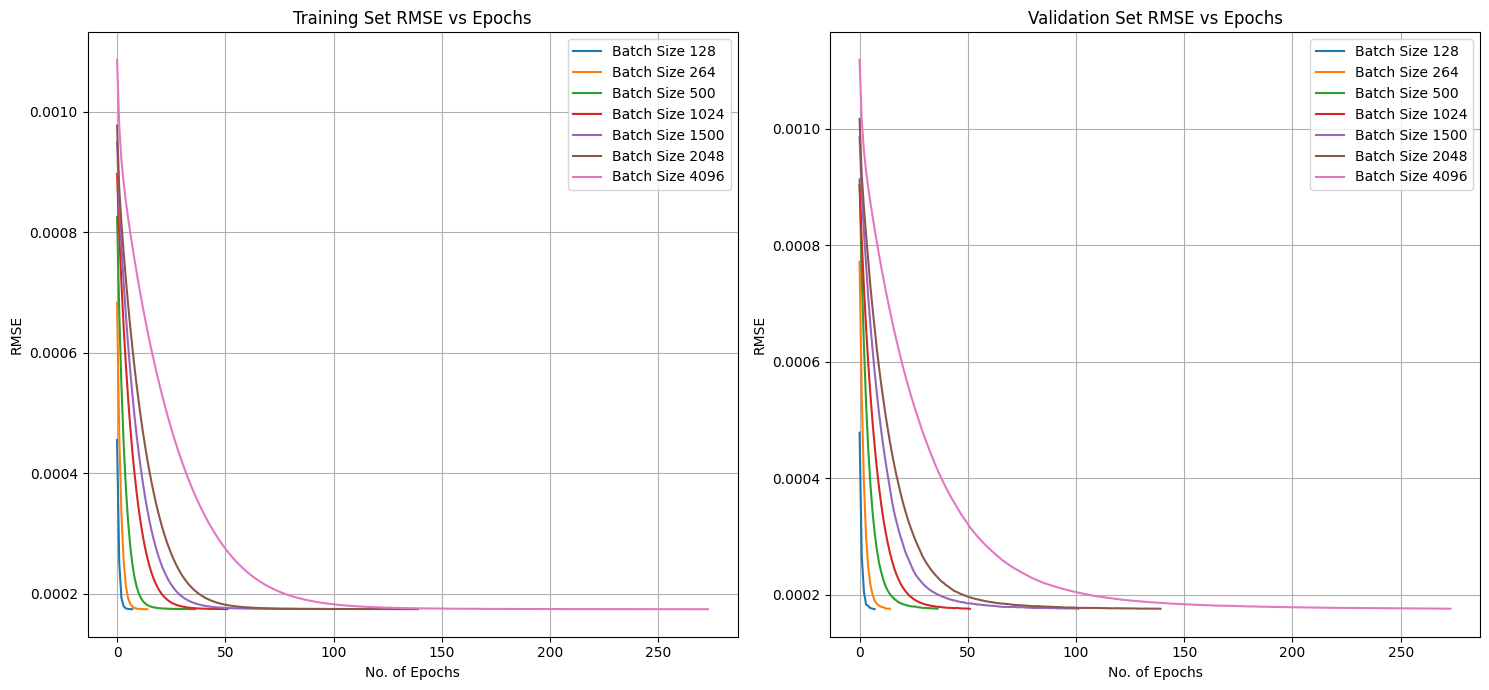

In [57]:
'''

In the previous output, we can see that the batch size 128 or greater
converged. So, for plotting, I am using the converged batch sizes.
-----------------------------------------------------------------------


Plot training and validation RMSE vs. epoch for all the converging batch
sizes (some batch sizes might not converge) in a figure.
The X-axis is Epoch # and the Y-axis is RMSE. [0.5]
'''

# List of batch sizes to try
batch_sizes = [128,264,500,1024,1500,2048,4096]

# Initialize lists to store results
final_weights_list = []
training_rmse_list = []
validation_rmse_list = []
elapsed_time_list = []
total_time_list = []

# Perform mini-batch gradient descent for each batch size
plt.figure(figsize=(15, 7))

# List to store training and validation RMSE for all batch sizes
all_training_rmse = []
all_validation_rmse = []

for batch_size in batch_sizes:
    print(f"Batch size: {batch_size}")
    final_weights, training_rmse, validation_rmse, elapsed_time, total_time, convergence = MiniBatchGradientDescent(X_train_normalized, y_train, X_val_normalized, y_val, batch_size, 0.01, rmse_val_direct * 1.001)

    # Store training and validation RMSE for each batch size
    all_training_rmse.append(training_rmse)
    all_validation_rmse.append(validation_rmse)

# Plot all training RMSE curves
plt.subplot(1, 2, 1)
for i, batch_size in enumerate(batch_sizes):
    plt.plot(all_training_rmse[i], label=f'Batch Size {batch_size}')
plt.xlabel('No. of Epochs')
plt.ylabel('RMSE')
plt.title('Training Set RMSE vs Epochs')
plt.grid()
plt.legend()

# Plot all validation RMSE curves
plt.subplot(1, 2, 2)
for i, batch_size in enumerate(batch_sizes):
    plt.plot(all_validation_rmse[i], label=f'Batch Size {batch_size}')
plt.xlabel('No. of Epochs')
plt.ylabel('RMSE')
plt.title('Validation Set RMSE vs Epochs')
plt.grid()
plt.legend()

plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()



Batch size: 128
Batch size 128 converges at 5
Batch size: 264
Batch size 264 converges at 11
Batch size: 500
Batch size 500 converges at 36
Batch size: 1024
Batch size 1024 converges at 78
Batch size: 1500
Batch size 1500 converges at 92
Batch size: 2048
Batch size 2048 converges at 118
Batch size: 4096
Batch size 4096 converges at 246
Batch size: 128
Batch size 128 converges at 7
Batch size: 264
Batch size 264 converges at 17
Batch size: 500
Batch size 500 converges at 29
Batch size: 1024
Batch size 1024 converges at 97
Batch size: 1500
Batch size 1500 converges at 78
Batch size: 2048
Batch size 2048 converges at 134
Batch size: 4096
Batch size 4096 converges at 275


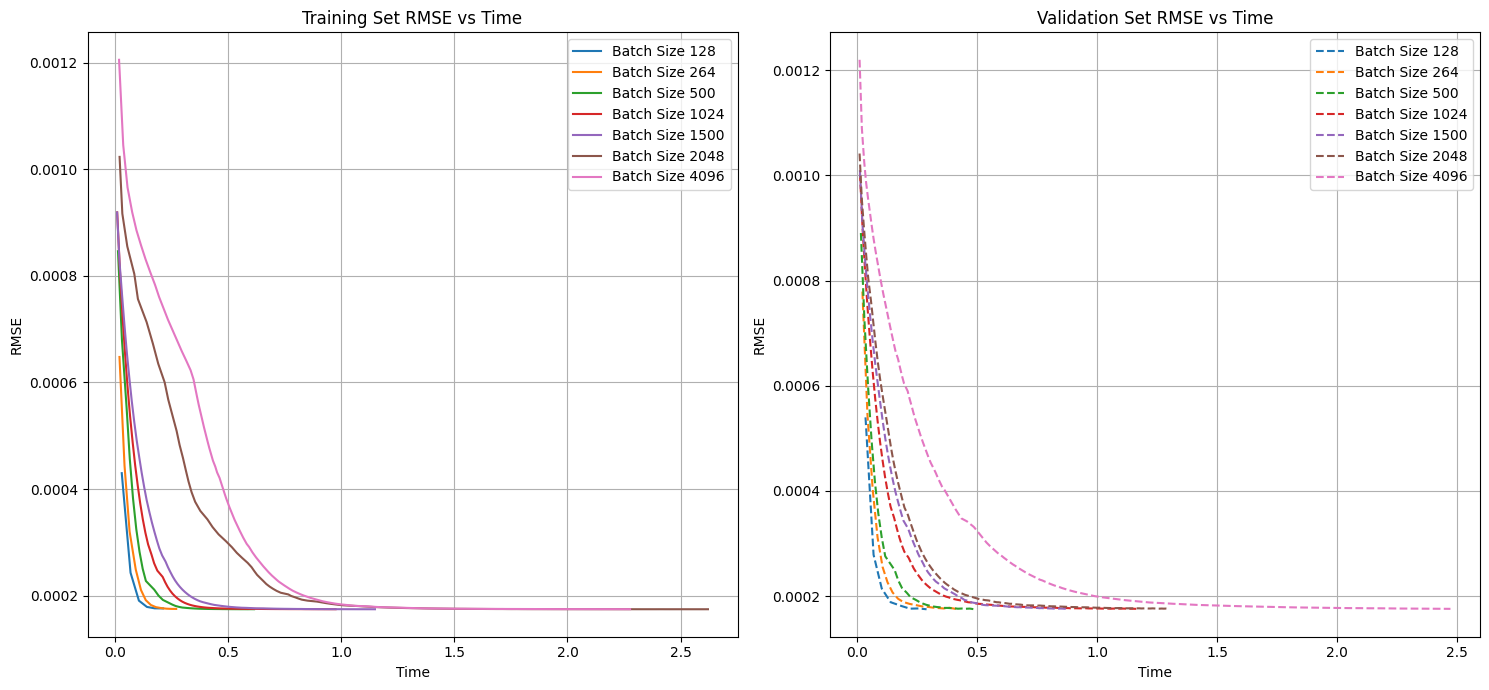

In [58]:
'''
Plot training and validation RMSE vs.
time for all the converging batch sizes in a figure.
The X-axis is Time, and the Y-axis is RMSE. [0.5]
---------------------------------------------------------------------------

'''


# Plot training and validation RMSE vs. time for all batch sizes
batch_sizes = [128,264,500,1024,1500,2048,4096]

plt.figure(figsize=(15, 7))

# Plot for Training Set RMSE vs Time
plt.subplot(1, 2, 1)
for batch_size in batch_sizes:
    print(f"Batch size: {batch_size}")
    final_weights, training_rmse, validation_rmse, elapsed_time, total_time, convergence = MiniBatchGradientDescent(X_train_normalized, y_train, X_val_normalized, y_val, batch_size, 0.01, rmse_val_direct * 1.001)
    plt.plot(elapsed_time, training_rmse, label='Batch Size {}'.format(batch_size), linestyle='solid')  # solid line for training set

plt.xlabel('Time')
plt.ylabel('RMSE')
plt.title('Training Set RMSE vs Time')
plt.grid()
plt.legend()

# Plot for Validation Set RMSE vs Time
plt.subplot(1, 2, 2)
for batch_size in batch_sizes:
    print(f"Batch size: {batch_size}")
    final_weights, training_rmse, validation_rmse, elapsed_time, total_time, convergence = MiniBatchGradientDescent(X_train_normalized, y_train, X_val_normalized, y_val, batch_size, 0.01, rmse_val_direct * 1.001)
    plt.plot(elapsed_time, validation_rmse, label='Batch Size {}'.format(batch_size), linestyle='dashed')  # dashed line for validation set

plt.xlabel('Time')
plt.ylabel('RMSE')
plt.title('Validation Set RMSE vs Time')
plt.grid()
plt.legend()

plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()

Batch size: 128
Batch size 128 converges at 7
Batch size: 264
Batch size 264 converges at 14
Batch size: 500
Batch size 500 converges at 36
Batch size: 1024
Batch size 1024 converges at 65
Batch size: 1500
Batch size 1500 converges at 106
Batch size: 2048
Batch size 2048 converges at 119
Batch size: 4096
Batch size 4096 converges at 207


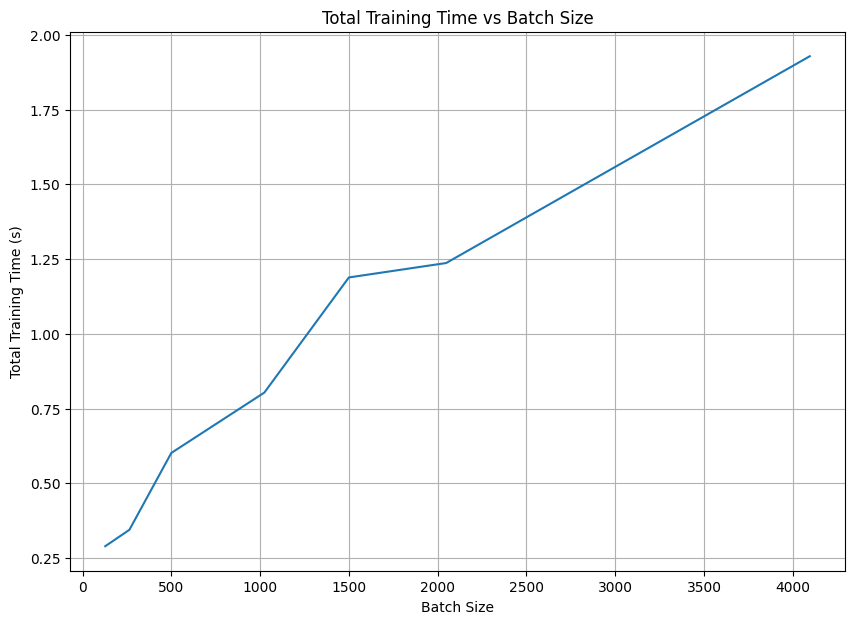

In [50]:

# Plot Total training time (y-axis) vs. Batch size (x-axis). [0.5]
# -----------------------------------------------------------------
total_times = []  # Collect total training times for plotting

plt.figure(figsize=(10, 7))
for batch_size in batch_sizes:
    print(f"Batch size: {batch_size}")
    final_weights, training_rmse, validation_rmse, elapsed_time, total_time, convergence= MiniBatchGradientDescent(X_train_normalized, y_train, X_val_normalized, y_val, batch_size, 0.01, rmse_val_direct * 1.001)

    total_times.append(total_time[0])  # Append total training time for this batch size

# Plot total training time vs batch size
plt.plot(batch_sizes, total_times)
plt.xlabel('Batch Size')
plt.ylabel('Total Training Time (s)')
plt.title('Total Training Time vs Batch Size')
plt.grid()
plt.show()


In [ ]:
'''
Describe your findings, including the main takeaways from each of your plots. [1]
-------------------------------------------------------------------------------

Training and Validation RMSE vs. Epoch:

This plot shows how the Root Mean Square Error (RMSE) changes with each epoch
for different batch sizes.

The X-axis represents the number of epochs, while the Y-axis represents the RMSE.

Each line represents a different batch size, with solid lines indicating the
training set RMSE and dashed lines indicating the validation set RMSE.

The plot indicates that as the number of epochs increases, the RMSE generally
decreases until convergence.

Convergence occurs when the RMSE stabilizes or reaches a minimum value.

Smaller batch sizes seem to converge faster compared to larger batch sizes
(only for converging batches).

- Training and Validation RMSE vs. Time:

This plot illustrates how the RMSE changes over time for different batch sizes.

The X-axis represents time, while the Y-axis represents the RMSE.

Similar to the previous plot, solid lines represent the training set RMSE,
and dashed lines represent the validation set RMSE.

The plot shows the RMSE decreasing over time as the algorithm iterates
through mini-batches.

It also demonstrates that smaller batch sizes lead to quicker
convergence compared to larger batch sizes.


There's a noticeable pattern where initially, both training and
validation RMSE are high, then the training RMSE decreases faster than the
validation RMSE before both converge.

Overall, the plots suggest that smaller batch sizes tend to converge faster
but might exhibit more fluctuation during training.

We can see that the total time increases as the number of batch size increases.


Larger batch sizes, on the other hand, take longer to converge but might
provide more stable results.
Additionally, there seems to be a consistent pattern of RMSE behavior
across different batch sizes, where both training and validation RMSE
decrease over time until convergence.



'''

## Part 5 - Gradient Descent Learning Rate [3 marks]
Use the function that you designed in Part 4 to investigate the effect of learning rate on convergence.

1. Pick 3 batch sizes that do not converge with a learning rate of $\alpha= 0.01$ (last part) and try to find a learning rate that results in convergence for each batch size. Report your findings in a table. Mention batch size, learning rate, and training and validation RMSE. **[1]**

2. Select the best batch size based on Part 4's fastest convergence time and sweep the learning rate (at least 10 values, all should converge) while applying Mini-batch GD.
  
  * Plot the training and validation RMSE vs. **epoch** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Plot the training and validation RMSE vs. **time** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Describe your findings, including the main takeaways from each of your plots. **[1]**

In [54]:
### YOUR CODE HERE ###

batch_sizes_not_converging = [8, 16, 32]
learning_rates_to_try = [0.001, 0.005, 0.0001, 0.05, 0.1]  # Learning rates to try for each batch size

# Initialize a table to store the results
results_table = []

# Iterate through each batch size
for batch_size in batch_sizes_not_converging:
    for learning_rate in learning_rates_to_try:
        print(f"Batch size: {batch_size} with Learning rate {learning_rate}")

        # Perform mini-batch gradient descent with the current batch size and learning rate
        final_weights, training_rmse, validation_rmse, elapsed_time, total_time, c = MiniBatchGradientDescent(X_train_normalized, y_train, X_val_normalized, y_val, batch_size, learning_rate, rmse_val_direct * 1.001)


        # Record the results in the table
        results_table.append({
            "Batch Size": batch_size,
            "Learning Rate": learning_rate,
            "Convergence": c,
            "Training RMSE": training_rmse[-1] if c == "converged" else None,
            "Validation RMSE": validation_rmse[-1] if c == "converged" else None
        })


Batch size: 8 with Learning rate 0.001
Batch size 8 converges at 2
Batch size: 8 with Learning rate 0.005
Validation RMSE is increasing for 4 consecutive epochs. Stopping training. Diverged
Batch size: 8 with Learning rate 0.0001
Batch size 8 converges at 45
Batch size: 8 with Learning rate 0.05
Validation RMSE is increasing for 4 consecutive epochs. Stopping training. Diverged
Batch size: 8 with Learning rate 0.1
Validation RMSE is increasing for 4 consecutive epochs. Stopping training. Diverged
Batch size: 16 with Learning rate 0.001
Batch size 16 converges at 5
Batch size: 16 with Learning rate 0.005
Validation RMSE is increasing for 4 consecutive epochs. Stopping training. Diverged
Batch size: 16 with Learning rate 0.0001
Batch size 16 converges at 129
Batch size: 16 with Learning rate 0.05
Validation RMSE is increasing for 4 consecutive epochs. Stopping training. Diverged
Batch size: 16 with Learning rate 0.1
Validation RMSE is increasing for 4 consecutive epochs. Stopping trainin

In [55]:
'''
Pick 3 batch sizes that do not converge with a learning rate of  α=0.01
(last part) and try to find a learning rate that results in convergence
for each batch size. Report your findings in a table. Mention batch size,
learning rate, and training and validation RMSE. [1]
----------------------------------------------------------------------------
'''

pd.DataFrame(results_table)

,Batch Size,Learning Rate,Convergence,Training RMSE,Validation RMSE
0,8,0.0010,converged,0.000177,0.000175
1,8,0.0050,False,NaN,NaN
2,8,0.0001,converged,0.000174,0.000176
3,8,0.0500,False,NaN,NaN
4,8,0.1000,False,NaN,NaN
5,16,0.0010,converged,0.000175,0.000176
6,16,0.0050,False,NaN,NaN
7,16,0.0001,converged,0.000174,0.000176
8,16,0.0500,False,NaN,NaN
9,16,0.1000,False,NaN,NaN


Learning Rate: 0.001
Batch size 128 converges at 92
Learning Rate: 0.002
Batch size 128 converges at 34
Learning Rate: 0.003
Batch size 128 converges at 31
Learning Rate: 0.004
Batch size 128 converges at 23
Learning Rate: 0.005
Batch size 128 converges at 17
Learning Rate: 0.006
Batch size 128 converges at 12
Learning Rate: 0.007
Batch size 128 converges at 8
Learning Rate: 0.008
Batch size 128 converges at 9
Learning Rate: 0.009
Batch size 128 converges at 8
Learning Rate: 0.015
Batch size 128 converges at 4


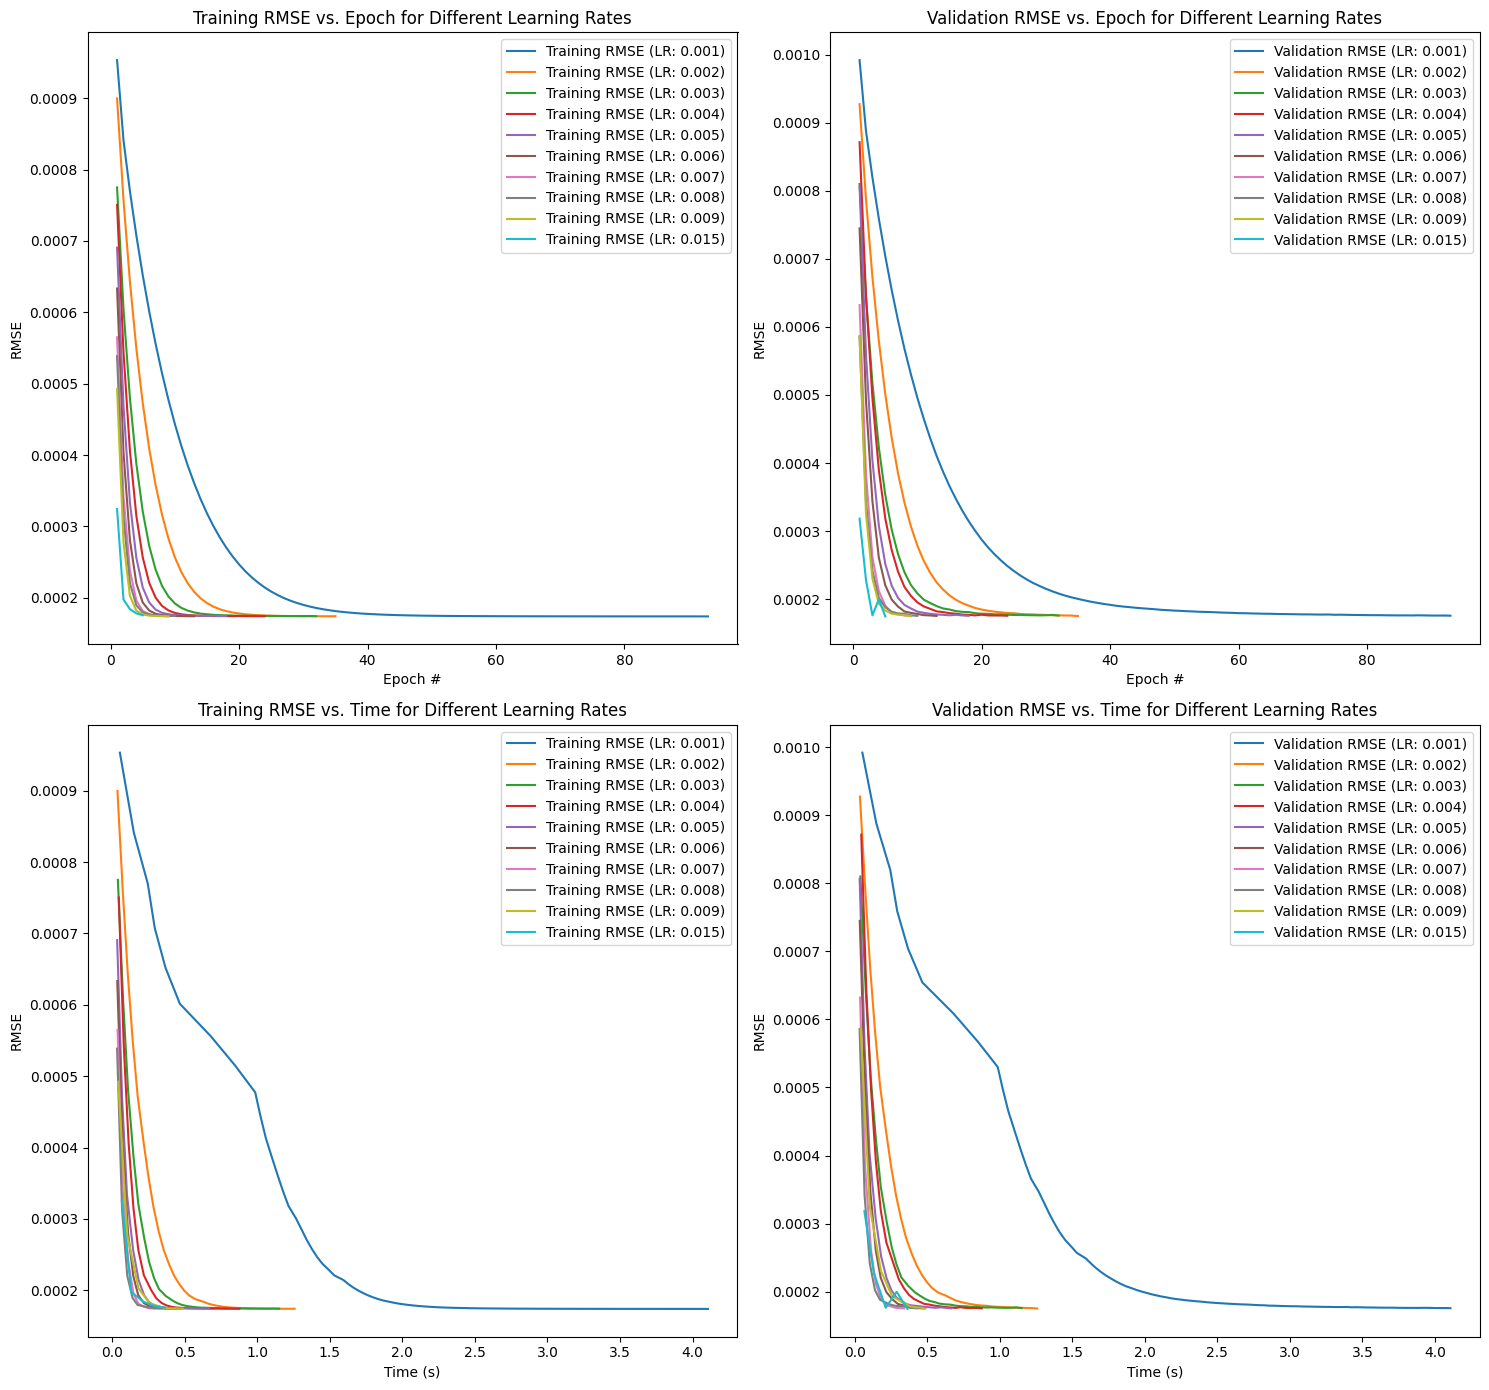

In [62]:
# Sweep different learning rates
'''

2. Select the best batch size based on Part 4's fastest convergence
time and sweep the learning rate (at least 10 values, all should
converge) while applying Mini-batch GD.

----------------------------------------------------------------------------
Plot the training and validation RMSE vs. epoch (x-axis) for all the learning rates that you tried in a figure. [0.5]
Plot the training and validation RMSE vs. time (x-axis) for all the learning rates that you tried in a figure. [0.5]



'''
learning_rates_to_try = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.015]  # At least 10 values for learning rate

# Initialize lists to store results for each learning rate
training_rmse_by_lr = []
validation_rmse_by_lr = []
elapsed_time_by_lr = []

fastest_batch_size = 128

# Perform mini-batch gradient descent for each learning rate
for learning_rate in learning_rates_to_try:
    print(f"Learning Rate: {learning_rate}")
    final_weights, training_rmse, validation_rmse, elapsed_time, total_time,c = MiniBatchGradientDescent(X_train_normalized, y_train, X_val_normalized, y_val, fastest_batch_size, learning_rate, rmse_val_direct * 1.001)

    # Append results to lists
    training_rmse_by_lr.append(training_rmse)
    validation_rmse_by_lr.append(validation_rmse)
    elapsed_time_by_lr.append(elapsed_time)

plt.figure(figsize=(15, 14))

# Plot training RMSE vs. epoch for all learning rates
plt.subplot(2, 2, 1)
for i, learning_rate in enumerate(learning_rates_to_try):
    plt.plot(range(1, len(training_rmse_by_lr[i]) + 1), training_rmse_by_lr[i], label=f'Training RMSE (LR: {learning_rate})')
plt.xlabel('Epoch #')
plt.ylabel('RMSE')
plt.title('Training RMSE vs. Epoch for Different Learning Rates')
plt.legend()

# Plot validation RMSE vs. epoch for all learning rates
plt.subplot(2, 2, 2)
for i, learning_rate in enumerate(learning_rates_to_try):
    plt.plot(range(1, len(validation_rmse_by_lr[i]) + 1), validation_rmse_by_lr[i], label=f'Validation RMSE (LR: {learning_rate})')
plt.xlabel('Epoch #')
plt.ylabel('RMSE')
plt.title('Validation RMSE vs. Epoch for Different Learning Rates')
plt.legend()

# Plot training RMSE vs. time for all learning rates
plt.subplot(2, 2, 3)
for i, learning_rate in enumerate(learning_rates_to_try):
    plt.plot(elapsed_time_by_lr[i], training_rmse_by_lr[i], label=f'Training RMSE (LR: {learning_rate})')
plt.xlabel('Time (s)')
plt.ylabel('RMSE')
plt.title('Training RMSE vs. Time for Different Learning Rates')
plt.legend()

# Plot validation RMSE vs. time for all learning rates
plt.subplot(2, 2, 4)
for i, learning_rate in enumerate(learning_rates_to_try):
    plt.plot(elapsed_time_by_lr[i], validation_rmse_by_lr[i], label=f'Validation RMSE (LR: {learning_rate})')
plt.xlabel('Time (s)')
plt.ylabel('RMSE')
plt.title('Validation RMSE vs. Time for Different Learning Rates')
plt.legend()

plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()

In [ ]:
'''
Describe your findings, including the main takeaways from each of your plots. [1]
--------------------------------------------------------------------------------


The convergence time (in terms of epochs) decreases as the learning rate
increases. This is evident from the "Training and Validation RMSE vs. Epoch for
Different Learning Rates" plot. Smaller learning rates like 0.001 require more
epochs to converge compared to larger learning rates like 0.015.

The fastest convergence times are observed for higher learning rates.
Specifically, learning rates of 0.007, 0.009, and 0.015 converge
the fastest, with convergence occurring in 8, 7, and 3 epochs respectively.


As seen in both plots, the RMSE decreases with each epoch for both training
and validation data, which is expected behavior during gradient descent optimization.

For smaller learning rates, the rate of decrease in RMSE slows down,
resulting in longer convergence times. Conversely, larger learning rates
exhibit faster initial decreases in RMSE but may oscillate or diverge if the rate is too high.

The optimal learning rate seems to be around 0.007 to 0.015, as these rates
achieve the fastest convergence without exhibiting oscillations or divergence.
'''